# *Salmonella* SRA Dataset Metadata Exploration

Written by John Christian Gaby

August 6, 2021

There are over 417,588 *Salmonella enterica* datasets in the SRA that I obtained with the following UNIX BASH command on August 4, 2021:

`esearch -db sra -query "Salmonella enterica[ORGN]" | esummary -format runinfo -mode xml | xtract -pattern Row -def "-" -element Run ReleaseDate LoadDate spots bases spots_with_mates avgLength size_MB AssemblyName download_path Experiment LibraryName LibraryStrategy LibrarySelection LibrarySource LibraryLayout InsertSize InsertDev Platform Model SRAStudy BioProject ProjectID Sample BioSample SampleType TaxID ScientificName SampleName Tumor CenterName Submission Consent RunHash ReadHash > SentericaRunInfoXMLextract.tsv`

This uses NCBI eUtils commands to download the runinfo in XML format (specification of text format rather than XML resulted in misalignment of the columns) for the SRA database query `Salmonella enterica[ORGN]`.

The output was saved in a tab-delimited file named `SentericaRunInfoXMLextract.tsv`. This file is 196.6 MBytes in size.

A dataset was similarly obtained for *Salmonella bongori*, which is explored before importing the *S. enterica* runinfo data. 

## Import Required Modules

The following modules are required in order to execute the code herein.

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from scipy.stats import norm

import datetime

import sys

The following command prints a list of imported modules along with their version. Note that the command `!pip list` will list all installed modules on the system, not just those that are loaded.

In [11]:
# The following code was copied verbatim from
# https://stackoverflow.com/questions/50395556/how-to-list-imported-modules-and-version-in-python3

import sys
for module in sys.modules:
    try:
        print(module,sys.modules[module].__version__)
    except:
        try:
            if  type(modules[module].version) is str:
                print(module,sys.modules[module].version)
            else:
                print(module,sys.modules[module].version())
        except:
            try:
                print(module,sys.modules[module].VERSION)
            except:
                pass

ipykernel._version 5.3.2
re 2.2.1
json 2.0.9
IPython.core.release 7.16.1
logging 0.5.1.2
zlib 1.0
six 1.15.0
ipython_genutils._version 0.2.0
ipython_genutils 0.2.0
platform 1.0.8
traitlets._version 4.3.3
traitlets 4.3.3
decorator 4.4.2
argparse 1.1
pygments 2.6.1
ptyprocess 0.6.0
pexpect 4.8.0
pickleshare 0.7.5
backcall 0.2.0
wcwidth 0.2.5
prompt_toolkit 3.0.5
parso 0.7.0
_ctypes 1.1.0
ctypes 1.1.0
colorama 0.4.3
jedi 0.17.1
urllib.request 3.8
IPython 7.16.1
jupyter_client._version 6.1.6
zmq.backend.cython.constants 40302
zmq.backend.cython 40302
zmq.sugar.constants 40302
zmq.sugar.version 19.0.1
zmq.sugar 19.0.1
zmq 19.0.1
jupyter_core.version 4.6.3
jupyter_core 4.6.3
distutils 3.8.3
jupyter_client 6.1.6
ipykernel 5.3.2
_curses b'2.2'
dateutil 2.8.1
_decimal 1.70
decimal 1.70
mkl 2.3.0
numpy.core._multiarray_umath 3.1
numpy.core 1.18.5
numpy.linalg._umath_linalg b'0.1.5'
numpy.lib 1.18.5
numpy 1.18.5
pytz 2020.1
bottleneck 1.3.2
_csv 1.0
csv 1.0
pandas 1.0.5
pyparsing 2.4.7
cycler 0.1

## *S. bongori*

## Import the RunInfo Data

The *S. bongori* RunInfo data is imported using the Pandas module `read_csv()` method and loaded as the object named `Sbongori`.

In [92]:
Sbongori = pd.read_csv("/home/chrisgaby/Documents/USDA/data/SRAfromEutils/SbongoriRunInfoXMLextract.tsv", sep='\t', header=None, names = ['Run', 'ReleaseDate', 'LoadDate', 'spots', 'bases', 'spots_with_mates', 'avgLength', 'size_MB', 'AssemblyName', 'download_path', 'Experiment', 'LibraryName', 'LibraryStrategy', 'LibrarySelection', 'LibrarySource', 'LibraryLayout', 'InsertSize', 'InsertDev', 'Platform', 'Model', 'SRAStudy', 'BioProject', 'ProjectID', 'Sample', 'BioSample', 'SampleType', 'TaxID', 'ScientificName', 'SampleName', 'Tumor', 'CenterName', 'Submission', 'Consent', 'RunHash', 'ReadHash'])

Next, the columns of the `Sbongori` data object are explored by indexing. The `LibrarySource` column is of special relevance because we are only interested in genomic sequence data, not transcriptomic, metagenomic, or synthetic data.

In [12]:
Sbongori["LibrarySource"]

0      GENOMIC
1      GENOMIC
2      GENOMIC
3      GENOMIC
4      GENOMIC
        ...   
284    GENOMIC
285    GENOMIC
286    GENOMIC
287    GENOMIC
288    GENOMIC
Name: LibrarySource, Length: 289, dtype: object

In [13]:
Sbongori["LibrarySource"].unique()

array(['GENOMIC', 'TRANSCRIPTOMIC', 'METAGENOMIC', 'SYNTHETIC'],
      dtype=object)

The `dtypes` method lists the data types (e.g. integer, float, datetime, etc.) for each column of the pandas data table named `Sbongori`.

In [109]:
Sbongori.dtypes

Run                         object
ReleaseDate         datetime64[ns]
LoadDate            datetime64[ns]
spots                        int64
bases                        int64
spots_with_mates             int64
avgLength                    int64
size_MB                      int64
AssemblyName                object
download_path               object
Experiment                  object
LibraryName                 object
LibraryStrategy             object
LibrarySelection            object
LibrarySource             category
LibraryLayout               object
InsertSize                   int64
InsertDev                    int64
Platform                    object
Model                       object
SRAStudy                    object
BioProject                  object
ProjectID                    int64
Sample                      object
BioSample                   object
SampleType                  object
TaxID                        int64
ScientificName              object
SampleName          

Next, I run the same code as above for loading the *S. bongori* runinfo data, except for the following:

1) The code is formatted by addition of line endings and automatic indentation that makes it visually easier to interpret.

2) I have added the arguments to the `read_csv()` function that establish data types for a few columns, including two columns that are date-time data.

In [113]:
Sbongori = pd.read_csv("/home/chrisgaby/Documents/USDA/data/SRAfromEutils/SbongoriRunInfoXMLextract.tsv",
                       sep='\t',
                       header=None,
                       names = ['Run',
                                'ReleaseDate',
                                'LoadDate',
                                'spots',
                                'bases',
                                'spots_with_mates',
                                'avgLength',
                                'size_MB',
                                'AssemblyName',
                                'download_path',
                                'Experiment',
                                'LibraryName',
                                'LibraryStrategy',
                                'LibrarySelection',
                                'LibrarySource',
                                'LibraryLayout',
                                'InsertSize',
                                'InsertDev',
                                'Platform',
                                'Model',
                                'SRAStudy',
                                'BioProject',
                                'ProjectID',
                                'Sample',
                                'BioSample',
                                'SampleType',
                                'TaxID',
                                'ScientificName',
                                'SampleName',
                                'Tumor',
                                'CenterName',
                                'Submission',
                                'Consent',
                                'RunHash',
                                'ReadHash'],
                       dtype = {'LibrarySource': 'category'},
                       parse_dates=['ReleaseDate', 'LoadDate'])

## Boolean Data Selection

I use boolean criteria to narrow down the data to only the genomic data sets that interest us. The following tests return TRUE or FALSE.

In [95]:
Sbongori["LibrarySource"] == "GENOMIC"

0      True
1      True
2      True
3      True
4      True
       ... 
284    True
285    True
286    True
287    True
288    True
Name: LibrarySource, Length: 289, dtype: bool

In [14]:
Sbongori["LibrarySource"] == "METAGENOMIC"

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Name: LibrarySource, Length: 289, dtype: bool

The following is an example of how to obtain the indices of True or False values in a list.

In [18]:
# From https://stackoverflow.com/questions/21448225/getting-indices-of-true-values-in-a-boolean-list
states = [False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False]
np.where(states)[0]

array([4, 5, 7])

In [19]:
np.where(Sbongori["LibrarySource"] == "METAGENOMIC")[0]

array([154, 155, 156, 157, 158, 159, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254, 255])

The following returns the Library Source value where the `LibrarySource` column contains the value `METAGENOMIC`.

In [20]:
Sbongori["LibrarySource"][np.where(Sbongori["LibrarySource"] == "METAGENOMIC")[0]]

154    METAGENOMIC
155    METAGENOMIC
156    METAGENOMIC
157    METAGENOMIC
158    METAGENOMIC
159    METAGENOMIC
221    METAGENOMIC
222    METAGENOMIC
223    METAGENOMIC
224    METAGENOMIC
225    METAGENOMIC
226    METAGENOMIC
227    METAGENOMIC
228    METAGENOMIC
229    METAGENOMIC
230    METAGENOMIC
231    METAGENOMIC
232    METAGENOMIC
233    METAGENOMIC
234    METAGENOMIC
235    METAGENOMIC
236    METAGENOMIC
237    METAGENOMIC
238    METAGENOMIC
239    METAGENOMIC
240    METAGENOMIC
241    METAGENOMIC
242    METAGENOMIC
243    METAGENOMIC
244    METAGENOMIC
245    METAGENOMIC
246    METAGENOMIC
247    METAGENOMIC
248    METAGENOMIC
249    METAGENOMIC
250    METAGENOMIC
251    METAGENOMIC
252    METAGENOMIC
253    METAGENOMIC
254    METAGENOMIC
255    METAGENOMIC
Name: LibrarySource, dtype: object

The following code returns all columns of the `Sbongori` dataframe where `LibrarySource` is `METAGENOMIC`.

In [22]:
Sbongori[Sbongori["LibrarySource"] == "METAGENOMIC"]

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,SampleType,TaxID,ScientificName,SampleName,Tumor,CenterName,Submission,Consent,RunHash,ReadHash
154,SRR6487812,2018-02-23 12:40:27,2018-02-23 10:59:14,221182,87186102,220815,394,31,assembly,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,UBA11429,no,UNIVERSITY OF QUEENSLAND,SRA648617,public,53C0B3B385CC3F54C9F5B034927DBA5E,22053BAECF18092886C96346CCC8B739
155,SRR6488136,2018-02-23 12:40:30,2018-02-23 10:59:08,54887,20016434,54077,364,7,assembly,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,UBA11430,no,UNIVERSITY OF QUEENSLAND,SRA648617,public,0EB4121A1D81B50D441A83F85165C065,FF8320EDCDFD5E300624F63800598DDB
156,SRR6487904,2018-02-23 12:48:18,2018-02-23 11:09:12,240942,90329089,240666,374,33,assembly,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,UBA12264,no,UNIVERSITY OF QUEENSLAND,SRA648617,public,24225FE88A0179A40FA56E03855B5139,7C15C6BDDEC535FA6039B99A45F01AD1
157,SRR6486182,2018-02-23 11:04:17,2018-02-23 10:39:38,231391,82757279,230861,357,34,assembly,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,UBA7987,no,UNIVERSITY OF QUEENSLAND,SRA648474,public,A17562EFC6D6D8745868B08614224FD3,FCB16BC82EDCEBFED73B9E752A082F90
158,SRR6486173,2018-02-23 11:04:17,2018-02-23 10:39:48,560318,222849850,559525,397,79,assembly,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,UBA7988,no,UNIVERSITY OF QUEENSLAND,SRA648474,public,7609B2DC4B88FB9BE4B6AF6BE9C9F2B9,134645CB44CF88155385382A8B2E2B12
159,SRR6485951,2018-02-23 11:06:18,2018-02-23 10:39:51,522545,187169652,522136,358,67,assembly,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,UBA7989,no,UNIVERSITY OF QUEENSLAND,SRA648474,public,3528467D1307D6DF39FD0DDCE1050CB1,208B84367C5C9BAE57C4BE108767138A
221,ERR588920,2014-08-31 23:02:31,2014-08-31 23:12:34,224694,88637960,224694,394,48,-,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,SAMEA2735021,no,UBP-CNRS,ERA352818,public,D83AAE221F5B63E9A77B35856BAF96D8,2BC6C1CEFFC24F95300EF50CE0565E7A
222,ERR588921,2014-08-31 23:02:30,2014-08-31 23:11:00,98017,36050172,98017,367,20,-,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,SAMEA2735022,no,UBP-CNRS,ERA352818,public,A6887C3EFE6E669426374D144F2AC36A,22B15239A9E6AEC2FFF69C2649BB9A03
223,ERR588922,2014-08-31 23:02:30,2014-08-31 23:11:05,210,71858,210,342,0,-,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,SAMEA2735023,no,UBP-CNRS,ERA352818,public,D34D0FFE44B9929479D72D4E0036C779,E9AEBB429E7F8071114C27440315025C
224,ERR588923,2014-08-31 23:02:30,2014-08-31 23:11:09,79,25969,79,328,0,-,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,SAMEA2735024,no,UBP-CNRS,ERA352818,public,17D6C212FCBC38A422954AB9924906EC,5531B89EFA197B2C15686C72A35CE1D4


The following code limits the DataFrame to only those rows for which the `LibrarySource` is `GENOMIC`.

In [23]:
# In order to limit to just the GENOMIC LibrarySource that interests us
Sbongori[Sbongori["LibrarySource"] == "GENOMIC"]

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,SampleType,TaxID,ScientificName,SampleName,Tumor,CenterName,Submission,Consent,RunHash,ReadHash
0,SRR14362444,2021-04-30 00:01:02,2021-04-29 16:24:11,2999506,566516925,2999506,188,270,-,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,1163721.biosample,no,PHE,SRA1225655,public,266671E73210C1485BD4C1C9A3B65301,688A3095DABA6D37478F2B272008E115
1,SRR14274498,2021-04-19 15:52:02,2021-04-19 15:34:48,2083109,1045720718,2083109,502,624,-,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,2018K-0683,no,CENTERS FOR DISEASE CONTROL AND PREVENTION,SRA1220314,public,CDA0D44BDC61BA608F8C73E76CC5E3EB,DE1B3F187563663CF0DE5CF956F4D196
2,SRR10741822,2019-12-20 07:12:46,2019-12-19 17:29:33,1657895,326323131,1657895,196,153,-,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,854884.biosample,no,PHE,SRA1014497,public,4F5E4FC5A0E374235F09EDDBD5BA7658,BC1FD46EBAE2875C497496533A55775E
3,SRR10741904,2019-12-20 07:12:46,2019-12-19 18:05:27,1831283,361388421,1831283,197,167,-,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,854885.biosample,no,PHE,SRA1014527,public,67626114CCD43CF318BDD81407A50967,922D87CE4A4C72B5B01A991F82B9DD2E
4,SRR10741836,2019-12-20 07:12:46,2019-12-19 17:44:57,1995889,397229033,1995889,199,184,-,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,854886.biosample,no,PHE,SRA1014510,public,4F017D824823DCA15308965DAA47014E,225E4B4A4D8E78CAEBE40FCA707D6F61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,ERR019475,2011-03-15 10:49:31,2014-05-29 15:36:29,11123855,1201376340,11123855,108,839,-,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,54736,Salmonella bongori,SAMEA923889,no,SC,ERA013605,public,89783908C867B4365B932533B202F578,E2472EE86B50CB841034365965455283
285,SRR493652,2012-05-04 10:15:45,2012-08-12 03:44:40,598187,180652474,598187,302,129,-,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,1173774,Salmonella bongori serovar 40:z35:- str. 95-0123,Salmonella bongori serovar 40:z35:- str. 95-0123,no,CFSAN,SRA052287,public,E6DC8AB2722DCB4266A736D2D7208613,6EA452DDAED75B76F2C9BD78B56347C5
286,SRR493653,2012-05-04 10:15:45,2012-08-12 03:45:26,2379168,352425436,0,148,859,-,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,simple,1173774,Salmonella bongori serovar 40:z35:- str. 95-0123,Salmonella bongori serovar 40:z35:- str. 95-0123,no,CFSAN,SRA052287,public,2D8BE3FA16C5BD7338148E5E508F7ACF,7AEF485561A3FDED1516147363B28993
287,SRR493646,2012-05-04 10:17:14,2012-08-12 03:44:35,542053,163700006,542053,302,115,-,https://sra-downloadb.st-va.ncbi.nlm.nih.gov/s...,...,simple,1173777,Salmonella bongori serovar 48:i:- str. 94-0708,Salmonella bongori serovar 48:i:- str. 94-0708,no,CFSAN,SRA052284,public,4F6063309166C1AA767928040CC8ABE6,757BB7FE12749C14455353E0068F8847


The following indexes list the size of each dataset in MB, limited to only those datasets with a `GENOMIC` `LibrarySource`.

In [26]:
# Obtain the size in MB of the SRA datasets that are GENOMIC LibrarySource
Sbongori["size_MB"][Sbongori["LibrarySource"] == "GENOMIC"]

0      270
1      624
2      153
3      167
4      184
      ... 
284    839
285    129
286    859
287    115
288    409
Name: size_MB, Length: 204, dtype: int64

The sum method is applied to the index to obtain the total size of *S. bongori* genomic datasets in MB.

In [27]:
# Sum the size in MB of the SRA datasets that are GENOMIC LibrarySource
Sbongori["size_MB"][Sbongori["LibrarySource"] == "GENOMIC"].sum()

85300

## *Salmonella enterica*

### Import the *S. enterica* RunInfo Metadata

The RunInfo data for all SRA datasets with *S. enterica* in the organism field is imported as the object named `Senterica`. 

In [3]:
Senterica = pd.read_csv("/home/chrisgaby/Documents/USDA/data/SRAfromEutils/SentericaRunInfoXMLextract.tsv",
                       sep='\t',
                       header=None,
                       names = ['Run',
                                'ReleaseDate',
                                'LoadDate',
                                'spots',
                                'bases',
                                'spots_with_mates',
                                'avgLength',
                                'size_MB',
                                'AssemblyName',
                                'download_path',
                                'Experiment',
                                'LibraryName',
                                'LibraryStrategy',
                                'LibrarySelection',
                                'LibrarySource',
                                'LibraryLayout',
                                'InsertSize',
                                'InsertDev',
                                'Platform',
                                'Model',
                                'SRAStudy',
                                'BioProject',
                                'ProjectID',
                                'Sample',
                                'BioSample',
                                'SampleType',
                                'TaxID',
                                'ScientificName',
                                'SampleName',
                                'Tumor',
                                'CenterName',
                                'Submission',
                                'Consent',
                                'RunHash',
                                'ReadHash'],
                       dtype = {'LibrarySource': 'category', 'Platform': 'category', 'Model': 'category'},
                       parse_dates=['ReleaseDate', 'LoadDate'])

Let's preview some of the data.

In [146]:
Senterica.head()

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,SampleType,TaxID,ScientificName,SampleName,Tumor,CenterName,Submission,Consent,RunHash,ReadHash
0,SRR15312715,2021-07-31 15:54:42,2021-07-31 15:47:10,1218049,244181100,1218049,200,115,-,https://sra-download.ncbi.nlm.nih.gov/traces/s...,...,simple,59201,Salmonella enterica subsp. enterica,1276784.biosample,no,PHE,SRA1267259,public,8AC7F277DF5FB5C0823EE1C1178CD3E3,1F28655D46D11DE6883CAC1F1B2131A0
1,SRR15319860,2021-08-02 00:00:27,2021-08-01 16:04:29,1377382,272071075,1377382,197,125,-,https://sra-download.ncbi.nlm.nih.gov/traces/s...,...,simple,59201,Salmonella enterica subsp. enterica,1277073.biosample,no,PHE,SRA1268110,public,AB4274E98A9CED661DC2D81EDEF77C3F,9CE519D5AD2CF64629E49F5FB4E639FE
2,SRR15319861,2021-08-02 00:00:27,2021-08-01 16:15:42,3686888,739666229,3686888,200,338,-,https://sra-download.ncbi.nlm.nih.gov/traces/s...,...,simple,59201,Salmonella enterica subsp. enterica,1280292.biosample,no,PHE,SRA1268112,public,B843A34D46472BEE2C593B0991D2A35F,A0F009C3AD41EFA069A1858A2B586330
3,SRR15319859,2021-08-02 00:00:27,2021-08-01 16:04:35,1867020,367049704,1867020,196,175,-,https://sra-download.ncbi.nlm.nih.gov/traces/s...,...,simple,59201,Salmonella enterica subsp. enterica,1289383.biosample,no,PHE,SRA1268111,public,E72E8FDEA2BFC6068B815CC21D28F133,B554D9152B804B25E2408D43DD1E4129
4,SRR15321228,2021-08-02 01:08:14,2021-08-02 01:07:24,1270017,375967986,1270017,296,217,-,https://sra-download.ncbi.nlm.nih.gov/traces/s...,...,simple,117541,Salmonella enterica subsp. enterica serovar Ohio,FSIS12141431,no,USDA-FSIS,SRA1268185,public,596422CC4F99E7370BBD4B1AB94B173B,7511E7FFDE8822F4037CFA91946CB6AC


Upon examination of the data types for the various data columns, it seems that `LoadDate` was not properly imported as `datetime` data type.

In [147]:
Senterica.dtypes

Run                         object
ReleaseDate         datetime64[ns]
LoadDate                    object
spots                        int64
bases                        int64
spots_with_mates             int64
avgLength                    int64
size_MB                      int64
AssemblyName                object
download_path               object
Experiment                  object
LibraryName                 object
LibraryStrategy             object
LibrarySelection            object
LibrarySource             category
LibraryLayout               object
InsertSize                   int64
InsertDev                    int64
Platform                  category
Model                     category
SRAStudy                    object
BioProject                  object
ProjectID                    int64
Sample                      object
BioSample                   object
SampleType                  object
TaxID                        int64
ScientificName              object
SampleName          

The `LoadDate` column contains `-` characters, which are obviously not in datetime format, which explains why the column failed to import as datetime data type.

In [148]:
Senterica["LoadDate"][Senterica["LoadDate"] == "-"]

21099     -
54274     -
54276     -
54277     -
54278     -
         ..
379475    -
379480    -
379482    -
406134    -
406135    -
Name: LoadDate, Length: 812, dtype: object

The following code remedies the errors and rewrites the column. Thereafter `LoadDate` is listed as the `datetime64[ns]` datatype.

In [149]:
Senterica['LoadDate'] = pd.to_datetime(Senterica['LoadDate'], errors='coerce')

In [150]:
Senterica['LoadDate'].dtype

dtype('<M8[ns]')

In [151]:
Senterica.dtypes

Run                         object
ReleaseDate         datetime64[ns]
LoadDate            datetime64[ns]
spots                        int64
bases                        int64
spots_with_mates             int64
avgLength                    int64
size_MB                      int64
AssemblyName                object
download_path               object
Experiment                  object
LibraryName                 object
LibraryStrategy             object
LibrarySelection            object
LibrarySource             category
LibraryLayout               object
InsertSize                   int64
InsertDev                    int64
Platform                  category
Model                     category
SRAStudy                    object
BioProject                  object
ProjectID                    int64
Sample                      object
BioSample                   object
SampleType                  object
TaxID                        int64
ScientificName              object
SampleName          

In [239]:
Senterica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417588 entries, 0 to 417587
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Run               417588 non-null  object        
 1   ReleaseDate       417588 non-null  datetime64[ns]
 2   LoadDate          416776 non-null  datetime64[ns]
 3   spots             417588 non-null  int64         
 4   bases             417588 non-null  int64         
 5   spots_with_mates  417588 non-null  int64         
 6   avgLength         417588 non-null  int64         
 7   size_MB           417588 non-null  int64         
 8   AssemblyName      417588 non-null  object        
 9   download_path     417588 non-null  object        
 10  Experiment        417588 non-null  object        
 11  LibraryName       417588 non-null  object        
 12  LibraryStrategy   417588 non-null  object        
 13  LibrarySelection  417588 non-null  object        
 14  Libr

## Dataset `size_MB`

The dataset `size_MB` will be examined to determine the volume of data that will need to be transeferred as well as the range of dataset sizes.

There are several methods for obtaining summary statistics, including `sum()`, `max()`, `min()`, `mean()`, `median()`, and `std()`, as demonstrated below. Note that the sum of the size in MB of all genomic datasets for *S. enterica* totals nearly 100 terabytes!

In [119]:
Senterica["size_MB"][Senterica["LibrarySource"] == "GENOMIC"].sum()

97562890

In [120]:
len(Senterica[Senterica["size_MB"] > 500])

13884

In [121]:
Senterica["size_MB"].max()

18817

In [5]:
Senterica["size_MB"][Senterica["LibrarySource"] == "GENOMIC"].max()

18817

In [122]:
Senterica["size_MB"].min()

0

In [123]:
Senterica["size_MB"].mean()

239.5053521652921

In [124]:
Senterica["size_MB"].median()

208.0

In [125]:
Senterica["size_MB"].std()

256.99980307476284

Since the largest dataset is 18,817 MB, and the mean and median are much lower at about 220 MB, before I plot a histogram I'll limit to just those datsets that are below 500 MB in size so that the x-axis range is manageable.

In [126]:
Senterica["size_MB"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] < 500)]

0         115
1         125
2         338
3         175
4         217
         ... 
417583    219
417584    210
417585    212
417586    213
417587    214
Name: size_MB, Length: 402215, dtype: int64

(array([ 6707., 33262., 69923., 84479., 76650., 57278., 35649., 20232.,
        11516.,  6519.]),
 array([  0. ,  49.9,  99.8, 149.7, 199.6, 249.5, 299.4, 349.3, 399.2,
        449.1, 499. ]),
 <a list of 10 Patch objects>)

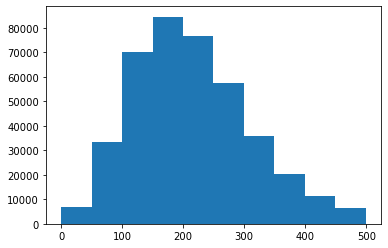

In [127]:
plt.hist(Senterica["size_MB"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] < 500)])

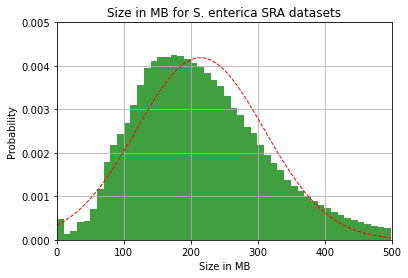

In [33]:
# From https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html

x = Senterica["size_MB"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] < 500)]
mu, sigma = x.mean(), x.std()

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density = True, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Size in MB')
plt.ylabel('Probability')
plt.title('Size in MB for S. enterica SRA datasets')
plt.axis([0, 500, 0, 0.005])
plt.grid(True)

plt.show()

It looks like most datasets are between 50 and 350 MB in size.

## Dataset `bases` and Coverage Criteria

Whereas the above histograms are of `size_MB`, the RunInfo includes `bases`, which will be useful for determining the number of genomic datasets that have sufficient bases to meet a coverage criterion.

Since the median size of a *S. enterica* genome is about 4.8 Mbases, to obtain 30x Illumina coverage, one needs 4.8 X 30 = 144 Mbases of quality sequence data. If one doubles that to 60x coverage, then 4.8 X 60 = 288 Mbases of quality sequence data are needed.

In [6]:
4.8 * 30

144.0

In [7]:
4.8 * 60

288.0

The following provides the number of genomic datasets that meet the 30X coverage criterion.

In [27]:
len(np.where((Senterica["LibrarySource"] == "GENOMIC") & (Senterica["bases"]>144000000))[0])

403749

And expressed as a proportion of `GENOMIC` datasets:

In [28]:
len(np.where((Senterica["LibrarySource"] == "GENOMIC") & (Senterica["bases"]>144000000))[0])/len(Senterica["LibrarySource"] == "GENOMIC")

0.9668596798758585

The number of datasets meeting a 60X coverage criterion is smaller:

In [26]:
len(np.where((Senterica["LibrarySource"] == "GENOMIC") & (Senterica["bases"]>288000000))[0])

326520

and the proportion of `GENOMIC` datasets that have 60X coverage is smaller as well:

In [24]:
len(np.where((Senterica["LibrarySource"] == "GENOMIC") & (Senterica["bases"]>288000000))[0])/len(Senterica["LibrarySource"] == "GENOMIC")

0.7819190206615133

## Histogram of `bases`

I create a histogram of `bases`, limiting the range from 0 to 1 x10^9 bases, or 1 Gbase, equivalent to 208X coverage for a 4.8 Mbase *S. enterica* genome.

In [69]:
1000000000/4800000

208.33333333333334

(array([  6084.,  22750.,  71250., 109147.,  87021.,  53491.,  27797.,
         14967.,   7871.,   4492.]),
 array([0.00000000e+00, 9.99980373e+07, 1.99996075e+08, 2.99994112e+08,
        3.99992149e+08, 4.99990186e+08, 5.99988224e+08, 6.99986261e+08,
        7.99984298e+08, 8.99982336e+08, 9.99980373e+08]),
 <a list of 10 Patch objects>)

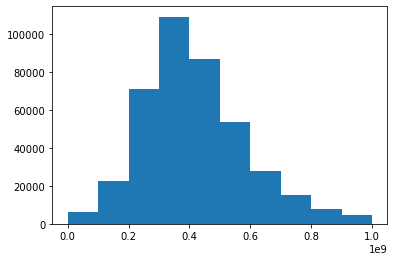

In [33]:
plt.hist(Senterica["bases"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["bases"]<1000000000)])

It appears that most datasets have arond 400 Mbases and range from about 200 to 700 Mbases.

## The Ratio of `size_MB` to `bases`

Assuming that `size_MB` is the filesize of the dataset in the SRA data compression format and that `bases` represent that number of nucleotide bases among the raw reads in the dataset, then we may divide these 2 values to obtain a compression ratio, although the best would be to have the value for filesize before SRA compression as well and use this number instead of the bases. Nonetheless, dividing `size_MB` and `bases` will still provide a ratio that can be plotted as a histogram to identify outliers and to obtain a visualization of the range of ratios.

First, I calculate the `size_MB/bases`.

In [64]:
(Senterica["size_MB"][Senterica["LibrarySource"] == "GENOMIC"]*1000000)/(Senterica["bases"][Senterica["LibrarySource"] == "GENOMIC"])

0         0.470962
1         0.459439
2         0.456963
3         0.476775
4         0.577177
            ...   
417583    0.512832
417584    0.524792
417585    0.518533
417586    0.530165
417587    0.522399
Length: 414901, dtype: float64

Next, I determine the maximum of this ratio of `size_MB` to `bases`.

In [63]:
((Senterica["size_MB"][Senterica["LibrarySource"] == "GENOMIC"]*1000000)/(Senterica["bases"][Senterica["LibrarySource"] == "GENOMIC"])).max()

inf

Of concern is that the maximum is infinity. This could result from having zeros in the denominator, and hence I'll look for zeros in `bases`.

In [9]:
(Senterica["bases"][Senterica["LibrarySource"] == "GENOMIC"]).min()

0

And there are zeros present. I'll go ahead and look for zeros in `size_MB`.

In [7]:
((Senterica["size_MB"][Senterica["LibrarySource"] == "GENOMIC"]*1000000)/(Senterica["bases"][Senterica["LibrarySource"] == "GENOMIC"])).min()

0.0

And zeros are present in `size_MB` too. These data will have to be excluded. First, I'll determine how many data with zeros are present.

In [66]:
len(Senterica["size_MB"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] == 0)])

1291

In [67]:
len(Senterica["bases"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["bases"] == 0)])

813

In [68]:
len(Senterica["bases"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] == 0) & (Senterica["bases"] == 0)])

812

Now I use the "not equal to" boolean `!=` to exclude those data that are 0 in `size_MB` and `bases` to obtain the ratio of `bases/size_MB`. Then I create the object `base_filesize_ratio` to store the ratios.

In [41]:
(Senterica["bases"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] != 0) & (Senterica["bases"] != 0)])/(1000000*Senterica["size_MB"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] != 0) & (Senterica["bases"] != 0)])

0         2.123314
1         2.176569
2         2.188362
3         2.097427
4         1.732571
            ...   
417583    1.949957
417584    1.905517
417585    1.928518
417586    1.886207
417587    1.914247
Length: 413609, dtype: float64

In [42]:
base_filesize_ratio = (Senterica["bases"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] != 0) & (Senterica["bases"] != 0)])/(1000000*Senterica["size_MB"][(Senterica["LibrarySource"] == "GENOMIC") & (Senterica["size_MB"] != 0) & (Senterica["bases"] != 0)])

In [44]:
base_filesize_ratio.min()

0.01975179069767442

In [45]:
base_filesize_ratio.max()

17.17511878723404

In [46]:
base_filesize_ratio.mean()

2.029096437142384

The mean ratio of `bases` to `size_MB` is about 2, although there are values as high as 17 and as low as 0.02.

## Histogram of `bases` to `size_MB` Ratio

I create a histogram of the `bases` to `size_MB` Ratio with 25 bins and zooming in on the range 0 to 5 where most of the data occur.

(array([7.40000e+01, 8.61000e+02, 7.60000e+02, 3.00000e+00, 2.00000e+00,
        8.22000e+02, 1.19100e+03, 3.18880e+04, 1.35719e+05, 8.69900e+04,
        3.88330e+04, 5.88370e+04, 3.09850e+04, 7.48800e+03, 2.29000e+03,
        1.52500e+03, 1.20000e+03, 1.17000e+03, 1.35400e+03, 1.96200e+03,
        2.28900e+03, 1.60700e+03, 1.60600e+03, 9.55000e+02, 7.55000e+02]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <a list of 25 Patch objects>)

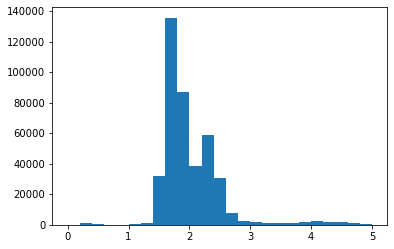

In [61]:
plt.hist(base_filesize_ratio, bins = 25, range=[0, 5])

I narrow the y-axis range to highlight the data with higher ratios from about 8 to 17, although these comprise only a few data points. There may be something irregular about these datasets, and they should be identified and a decision should be made as to whether to eliminate them from analysis.

(0.0, 20.0)

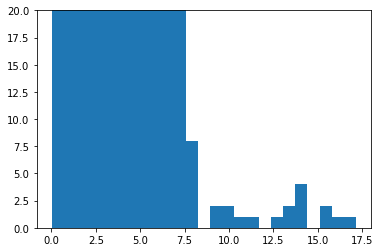

In [62]:
plt.hist(base_filesize_ratio, bins = 25)
plt.ylim(0,20)

## Scatterplots of `size_MB` vs. `bases`

The filesize as `size_MB` should increase proportionally to the number of bases `bases`. Hence, I'll produce a scatterplot to see whether the linear effect is present.

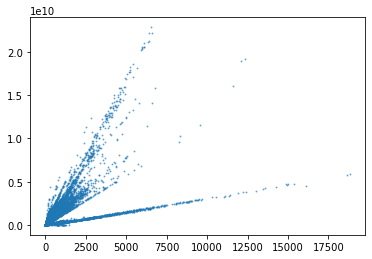

In [37]:
x = Senterica["size_MB"]
y = Senterica["bases"]

plt.scatter(x, y, s=1, alpha=0.5)
plt.show()

Indeed, there is a linear increase, although there are several distinct ratios. I'll color the points on the scatterplot by some of the categorical variables like `Platform` to try to identify the factor leading to apparently distinct ratios of `size_MB` to `bases`.

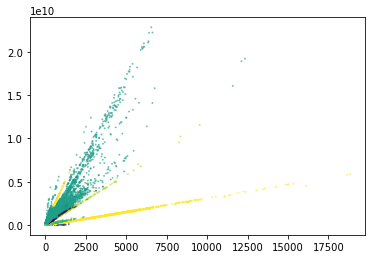

In [52]:
x = Senterica["size_MB"]
y = Senterica["bases"]

col_platform = Senterica["Platform"].astype('category').cat.codes

plt.scatter(x, y, s=1, c=col_platform, alpha=0.5)

plt.show()

This might be related to platform, although I'll produce a multi-panel plot to look at several of the categorical variables side-by-side.

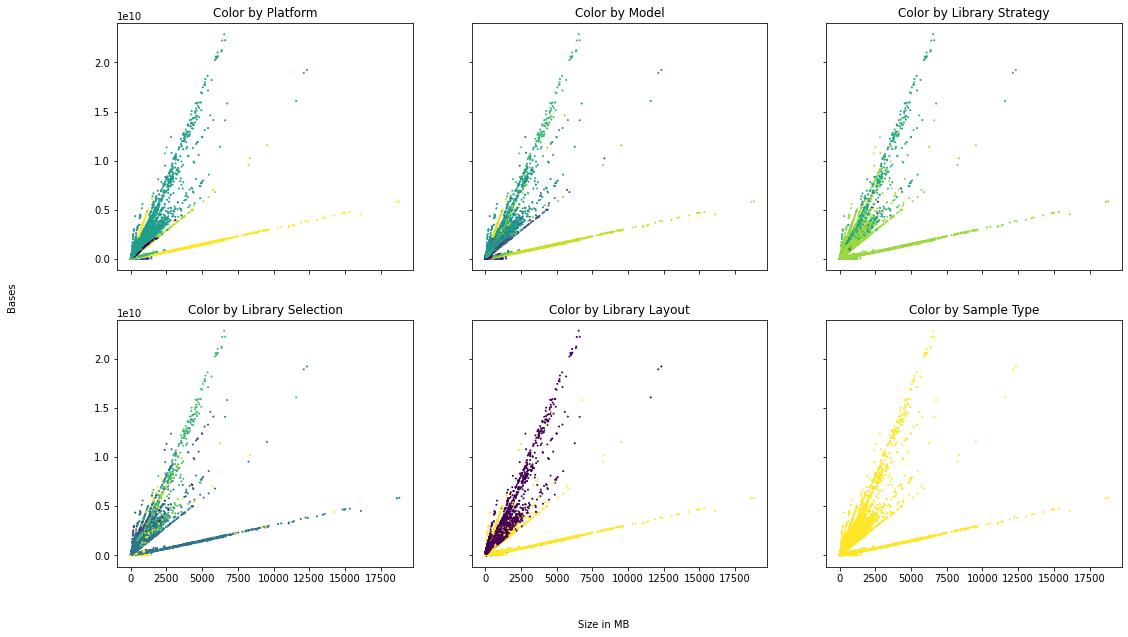

In [79]:
x = Senterica["size_MB"]
y = Senterica["bases"]

fig, ax = plt.subplots(nrows=2, ncols=3, sharex= True, sharey = True, figsize=(18, 10))

fig.text(0.5, 0.04, 'Size in MB', ha='center')
fig.text(0.04, 0.5, 'Bases', va='center', rotation='vertical')

col_platform = Senterica["Platform"].astype('category').cat.codes
col_model = Senterica["Model"].astype('category').cat.codes
col_libstrat = Senterica["LibraryStrategy"].astype('category').cat.codes
col_libselection = Senterica["LibrarySelection"].astype('category').cat.codes
col_liblayout = Senterica["LibraryLayout"].astype('category').cat.codes
col_samptype = Senterica["SampleType"].astype('category').cat.codes

# First row of figures
ax[0,0].scatter(x, y, c=col_platform, s=1)
ax[0,0].set_title('Color by Platform')

ax[0,1].scatter(x, y, c=col_model, s=1)
ax[0,1].set_title('Color by Model')

ax[0,2].scatter(x, y, c=col_libstrat, s=1)
ax[0,2].set_title('Color by Library Strategy')

# Second row of figures
ax[1,0].scatter(x, y, c=col_libselection, s=1)
ax[1,0].set_title('Color by Library Selection')

ax[1,1].scatter(x, y, c=col_liblayout, s=1)
ax[1,1].set_title('Color by Library Layout')

ax[1,2].scatter(x, y, c=col_samptype, s=1)
ax[1,2].set_title('Color by Sample Type')

plt.show()

fig.savefig('SentericaMByteByBasesMultipanel.png', dpi=100)

In [9]:
#pd.to_datetime(np.datetime
Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"]

0         2021-07-31 15:54:42
1         2021-08-02 00:00:27
2         2021-08-02 00:00:27
3         2021-08-02 00:00:27
4         2021-08-02 01:08:14
                 ...         
417583    2021-07-31 21:05:40
417584    2021-07-31 21:05:40
417585    2021-07-31 21:05:40
417586    2021-07-31 20:56:03
417587    2021-07-31 21:05:41
Name: ReleaseDate, Length: 414901, dtype: object

In [13]:
time_examp = np.datetime64("2021-07-31 15:54:42")

In [14]:
type(time_examp)

numpy.datetime64

In [17]:
pd.Timestamp(time_examp).day_name()

'Saturday'

In [28]:
type(pd.to_datetime(time_examp))

pandas._libs.tslibs.timestamps.Timestamp

In [32]:
pd.to_datetime(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"])

0        2021-07-31 15:54:42
1        2021-08-02 00:00:27
2        2021-08-02 00:00:27
3        2021-08-02 00:00:27
4        2021-08-02 01:08:14
                 ...        
417583   2021-07-31 21:05:40
417584   2021-07-31 21:05:40
417585   2021-07-31 21:05:40
417586   2021-07-31 20:56:03
417587   2021-07-31 21:05:41
Name: ReleaseDate, Length: 414901, dtype: datetime64[ns]

In [231]:
#pd.to_datetime(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"]).dt.to_period('A')
#pd.to_datetime(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"]).dt.year
#pd.to_datetime(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"]).dt.dayofweek
#pd.to_datetime(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"]).dt.weekofyear
#pd.to_datetime(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"]).dt.dayofyear

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
417583    2021
417584    2021
417585    2021
417586    2021
417587    2021
Name: ReleaseDate, Length: 414901, dtype: int64

In [226]:
Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"].dt.year

0         2021
1         2021
2         2021
3         2021
4         2021
          ... 
417583    2021
417584    2021
417585    2021
417586    2021
417587    2021
Name: ReleaseDate, Length: 414901, dtype: int64

In [215]:
release_years = pd.to_datetime(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"]).dt.year
release_year_counts = pd.Series(release_years).value_counts()
release_year_counts

2019    85695
2020    82947
2018    79590
2017    49315
2021    45904
2015    23951
2016    23735
2014    15421
2013     4877
2011     1912
2012     1461
2010       91
2009        2
Name: ReleaseDate, dtype: int64

In [214]:
release_year_counts.name

array([85695, 82947, 79590, 49315, 45904, 23951, 23735, 15421,  4877,
        1912,  1461,    91,     2])

In [ ]:
release_year_counts.index

In [ ]:
release_year_counts.values

In [ ]:
release_year_counts.iloc[3]

In [217]:
release_year_counts.sort_index()

2009        2
2010       91
2011     1912
2012     1461
2013     4877
2014    15421
2015    23951
2016    23735
2017    49315
2018    79590
2019    85695
2020    82947
2021    45904
Name: ReleaseDate, dtype: int64

In [218]:
release_year_counts_index_sorted = release_year_counts.sort_index()

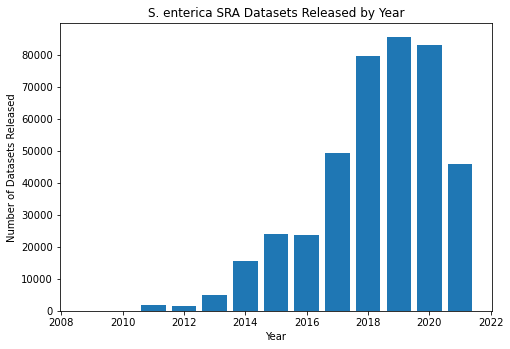

In [251]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(release_year_counts_index_sorted.index,release_year_counts_index_sorted.values)
ax.set_ylabel('Number of Datasets Released')
ax.set_title('S. enterica SRA Datasets Released by Year')
ax.set_xlabel('Year')
plt.show()

In [199]:
yr_uniq, counts = np.unique(release_years, return_counts=True)
d = {'year': yr_uniq, 'count': counts}
Senterica_annual_counts = pd.DataFrame(d)
Senterica_annual_counts = Senterica_annual_counts[Senterica_annual_counts["year"] != 2021] # Remove 2021
Senterica_annual_counts

,year,count
0,2009,2
1,2010,91
2,2011,1912
3,2012,1461
4,2013,4877
5,2014,15421
6,2015,23951
7,2016,23735
8,2017,49315
9,2018,79590


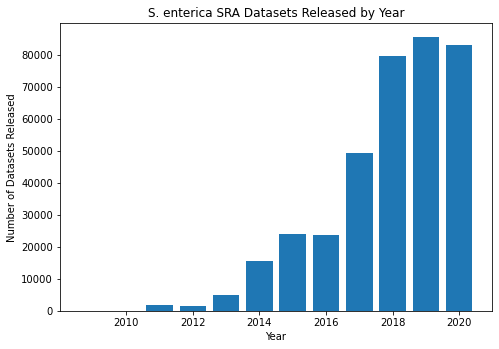

In [250]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Senterica_annual_counts["year"],Senterica_annual_counts["count"])
ax.set_ylabel('Number of Datasets Released')
ax.set_title('S. enterica SRA Datasets Released by Year')
ax.set_xlabel('Year')
plt.show()

In [190]:
Senterica_annual_counts[Senterica_annual_counts["year"] != 2021]

,year,count
0,2009,2
1,2010,91
2,2011,1912
3,2012,1461
4,2013,4877
5,2014,15421
6,2015,23951
7,2016,23735
8,2017,49315
9,2018,79590


In [161]:
from collections import Counter

Counter(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"].dt.year)

Counter({2021: 45904,
         2020: 82947,
         2019: 85695,
         2016: 23735,
         2018: 79590,
         2017: 49315,
         2015: 23951,
         2012: 1461,
         2011: 1912,
         2014: 15421,
         2010: 91,
         2013: 4877,
         2009: 2})

In [237]:
annual_counts = Counter(Senterica["ReleaseDate"][Senterica["LibrarySource"] == "GENOMIC"].dt.year)
type(annual_counts)

collections.Counter

In [257]:
libsource = Senterica["LibrarySource"]
libsource_counts = libsource.value_counts()
libsource_counts

GENOMIC               414901
TRANSCRIPTOMIC          2319
METAGENOMIC              237
OTHER                     82
SYNTHETIC                 48
METATRANSCRIPTOMIC         1
Name: LibrarySource, dtype: int64

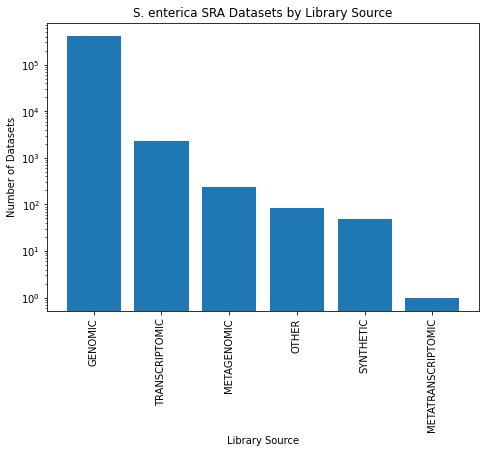

In [258]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(libsource_counts.index, libsource_counts.values)
ax.set_ylabel('Number of Datasets')
ax.set_title('S. enterica SRA Datasets by Library Source')
ax.set_xlabel('Library Source')
plt.xticks(rotation = 90)
plt.yscale("log")
plt.show()

In [282]:
libstrat = Senterica["LibraryStrategy"]
libstrat_counts = libstrat.value_counts()
libstrat_counts

WGS                 411897
RNA-Seq               2251
AMPLICON              1826
OTHER                  519
Tn-Seq                 345
WGA                    283
ChIP-Seq               137
Targeted-Capture       129
RIP-Seq                 68
POOLCLONE               57
FINISHING               27
FL-cDNA                 14
CLONE                   10
WCS                      7
ncRNA-Seq                6
WXS                      3
miRNA-Seq                3
RAD-Seq                  2
CLONEEND                 2
MeDIP-Seq                1
Bisulfite-Seq            1
Name: LibraryStrategy, dtype: int64

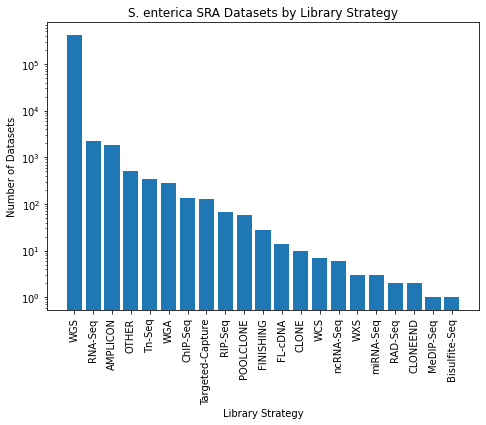

In [283]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(libstrat_counts.index, libstrat_counts.values)
ax.set_ylabel('Number of Datasets')
ax.set_title('S. enterica SRA Datasets by Library Strategy')
ax.set_xlabel('Library Strategy')
plt.xticks(rotation = 90)
plt.yscale("log")
plt.show()

0         SRS9652593
1         SRS9659055
2         SRS9659056
3         SRS9659054
4         SRS9659756
             ...    
417583    SRS9621081
417584    SRS9621080
417585    SRS9621079
417586    SRS9620416
417587    SRS9621092
Name: Sample, Length: 417588, dtype: object

In [248]:
platform = Senterica["Platform"][Senterica["LibrarySource"] == "GENOMIC"]
platform_counts = platform.value_counts()
platform_counts

ILLUMINA             410582
PACBIO_SMRT            1206
OXFORD_NANOPORE        1017
LS454                   743
ION_TORRENT             718
BGISEQ                  412
CAPILLARY               125
ABI_SOLID                95
HELICOS                   2
COMPLETE_GENOMICS         1
Name: Platform, dtype: int64

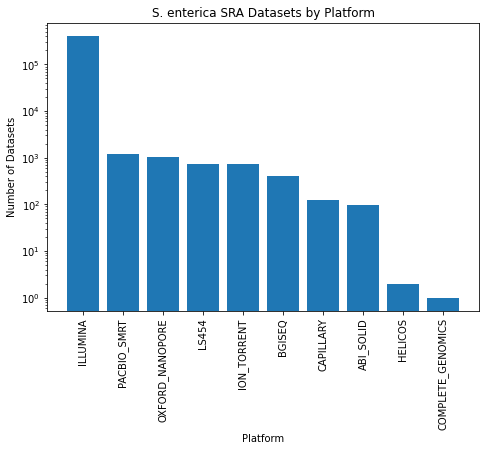

In [254]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(platform_counts.index,platform_counts.values)
ax.set_ylabel('Number of Datasets')
ax.set_title('S. enterica SRA Datasets by Platform')
ax.set_xlabel('Platform')
plt.xticks(rotation = 90)
plt.yscale("log")
plt.show()

In [34]:
Senterica.columns

Index(['Run', 'ReleaseDate', 'LoadDate', 'spots', 'bases', 'spots_with_mates',
       'avgLength', 'size_MB', 'AssemblyName', 'download_path', 'Experiment',
       'LibraryName', 'LibraryStrategy', 'LibrarySelection', 'LibrarySource',
       'LibraryLayout', 'InsertSize', 'InsertDev', 'Platform', 'Model',
       'SRAStudy', 'BioProject', 'ProjectID', 'Sample', 'BioSample',
       'SampleType', 'TaxID', 'ScientificName', 'SampleName', 'Tumor',
       'CenterName', 'Submission', 'Consent', 'RunHash', 'ReadHash'],
      dtype='object')

In [54]:
Senterica["ScientificName"].unique()

array(['Salmonella enterica subsp. enterica',
       'Salmonella enterica subsp. enterica serovar Ohio',
       'Salmonella enterica subsp. enterica serovar Johannesburg', ...,
       'Salmonella enterica subsp. enterica serovar Montevideo str. R8_4892',
       'Salmonella enterica subsp. enterica serovar Montevideo str. R8_4893',
       'Salmonella enterica subsp. enterica serovar Montevideo str. R8_4918'],
      dtype=object)

In [55]:
len(Senterica["ScientificName"].unique())

2449

In [270]:
sci_name = Senterica["ScientificName"][Senterica["LibrarySource"] == "GENOMIC"]
sci_name = sci_name.value_counts()
sci_name

Salmonella enterica                                                            219248
Salmonella enterica subsp. enterica serovar Enteritidis                         34052
Salmonella enterica subsp. enterica serovar Typhimurium                         24408
Salmonella enterica subsp. enterica                                             19417
Salmonella enterica subsp. enterica serovar Typhi                               13816
                                                                                ...  
Salmonella enterica subsp. enterica serovar Bournemouth                             1
Salmonella enterica subsp. enterica serovar Enteritidis str. CDC_2010K_1018         1
Salmonella enterica subsp. enterica serovar Montevideo str. R8_4928                 1
Salmonella enterica subsp. enterica serovar Senftenberg str. CFSAN004062            1
Salmonella enterica subsp. enterica serovar Splott                                  1
Name: ScientificName, Length: 2439, dtype: int64

In [278]:
list(sci_name.values == 1).count(True) #count singletons

1472

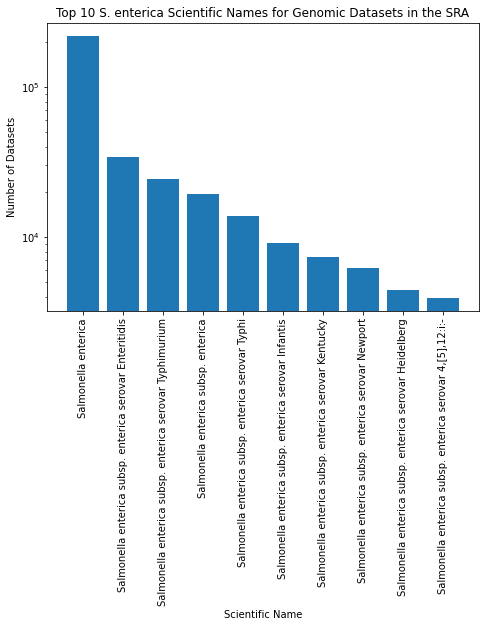

In [280]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(sci_name.index[0:10], sci_name.values[0:10])
ax.set_ylabel('Number of Datasets')
ax.set_title('Top 10 S. enterica Scientific Names for Genomic Datasets in the SRA')
ax.set_xlabel('Scientific Name')
plt.xticks(rotation = 90)
plt.yscale("log")
plt.show()

In [287]:
cent_name = Senterica["CenterName"][Senterica["LibrarySource"] == "GENOMIC"]
cent_name = cent_name.value_counts()
cent_name

PULSENET                                                              87676
EDLB-CDC                                                              84396
PHE                                                                   52186
CFSAN                                                                 47604
USDA-FSIS                                                             31980
                                                                      ...  
HOSPITAL UNIVERSITARIO LA PAZ                                             1
INSTITUTE FOR MICROBIOLOGY AND EPIZOOTICS, FREIE UNIVERSITY BERLIN        1
BEIJING AGRICULTURE UNIVERSITY                                            1
ETZ TILBURG                                                               1
UFMG                                                                      1
Name: CenterName, Length: 421, dtype: int64

In [288]:
list(cent_name.values == 1).count(True) #count centers with just 1 contribution

61

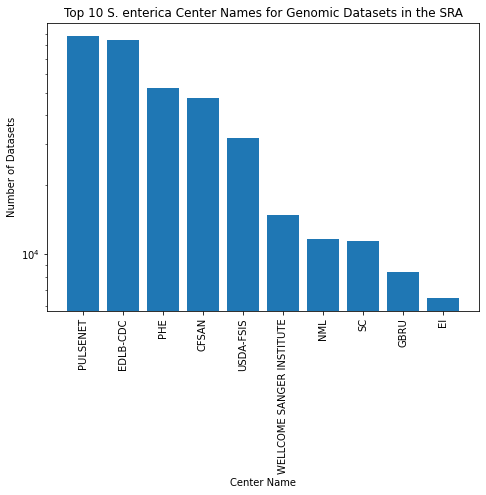

In [289]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(cent_name.index[0:10], cent_name.values[0:10])
ax.set_ylabel('Number of Datasets')
ax.set_title('Top 10 S. enterica Center Names for Genomic Datasets in the SRA')
ax.set_xlabel('Center Name')
plt.xticks(rotation = 90)
plt.yscale("log")
plt.show()

### Additional work

2. Barplots of number of SRA datasets released per year faceted by CenterName

### Conversion to PDF

This Jupyter Notebook may be converted to a pdf that displays all text, code, and output with the following command executed at the BASH prompt:

`jupyter-nbconvert --to pdf /home/chrisgaby/Documents/USDA/JupyterNotebooks/SalmonellaRunInfoFromSRA.ipynb`